# Ферромагнетизм

Найти тепло, выделившееся при намагничивании до насыщения и последующем полном размагничивании цилиндрического образца объёмом $V$, если процесс намагничивания и размагничивания описывается:
$$B_\uparrow(H) = B_s \arctan(H - H_c)$$
$$B_\downarrow(H) = B_s \arctan(H + H_c).$$
Здесь $B_s$ - магнитная индуктивность насыщения, $H_c$ - коэрцитивная сила (от лат. coercitio "удерживание"), т.е. значение напряжённости внешнего магнитного поля, необходимое для полного размагничивания.

![схема намагничивания](pics/ferromagnetism.png)

### ***
Тепловые потери обусловлены работой, необходимой для выполнения цикла намагничивания-размагничивания. Эта работа на единицу объёма ферромагнетика рассчитывается как площадь между кривыми намаагничивания и размагничивания: $\oint \vec{B}\,d\vec{H}.$ Тогда выделившееся тепло во всём образце:
$$Q = V\oint \vec{B}\,d\vec{H} = V \left( \int_{-\infty}^{+\infty} B_\uparrow(H)\,dH - \int_{-\infty}^{+\infty} B_\downarrow(H)\,dH \right).$$

## Численное решение

Начнём с импорта необходимых библиотек: `NumPy` для работы с массивами, `SciPy` для численного интегрирования и `matplotlib` для построения графиков.

In [1]:
import numpy as np
import scipy.integrate

%matplotlib inline
import matplotlib.pyplot as plt

Зададим конкретные численные значения для констант, входящих в задачу: индуктивность насыщения $B_s$, коэрцитивная сила $H_c$, объём образца $V$.

In [2]:
Bs = 1.5    # Т, индукция насыщения
Hc = 20.0   # A/m, 
V = 0.00004 # м3, объём образца 10см * 2см * 2см

mu0 = 1.2566e-6 # Н/м, магнитная постоянная

Определим функции, описывающие процесс намагничивания `B_up` и размагничивания `B_down`.

In [3]:
def B_up(H):
    return Bs * np.arctan(H - Hc)
    
def B_down(H):
    return Bs * np.arctan(H + Hc)

Для наглядности построим графики этих функций.

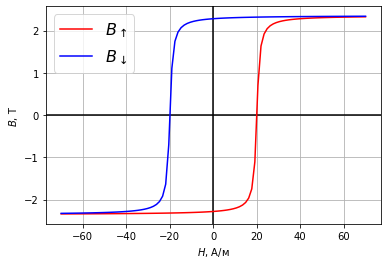

In [4]:
# Дискретная сетка 
hh = np.linspace(-70, 70, 100)

# Подписи осей в формате TeX
plt.xlabel(r'$H$, А/м')
plt.ylabel(r'$B$, Т')
plt.grid(True)

# Вертикальная и горизонтальная черные линии X=0, Y=0, отмечающие оси координат 
plt.axvline(x=0.0, color='black')
plt.axhline(y=0.0, color='black')

# Графики с подписями в формате TeX, линии красная и синяя
plt.plot(hh, B_up(hh), 'r', label = r'$B_\uparrow$' )
plt.plot(hh, B_down(hh), 'b', label = r'$B_\downarrow$')
plt.legend(loc='best', fontsize=16);

plt.show()

Для численного интегрирования воспользуемся методом `scipy.integrate.quad()` (quadrature) из библиотеки SciPy. Этот метод выполняет адаптивное вычисление определённого интеграла функции одной переменной и в том числе предоставляет возможность указания бесконечных пределов интегрирования. Метод возвращает значение интеграла и достигнутую точность. 

In [5]:
Qup, err1 = scipy.integrate.quad( B_up, -np.inf, +np.inf )
print( Qup, err1 )
Qdown, err2 = scipy.integrate.quad( B_down, -np.inf, +np.inf )
print( Qdown, err2 )

-94.24777960769555 1.8289230408084628e-08
94.24777960769555 1.8289230408084628e-08


Видно, что при численном интегрировании достигнута достаточно высокая точность. В итоге искомые тепловые потери на намагничивание и размагничивание образца ферромагнетика составляют:

In [6]:
Q = V*(Qup - Qdown)
print( 'Q = {} Дж'.format(Q) )

Q = -0.007539822368615645 Дж
